In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_folder = '../data'
data_file = 'cleaned_data.parquet'


In [111]:
#read data
cars_data = pd.read_parquet(os.path.join(data_folder, data_file))

cars_data_cat = pd.read_parquet(os.path.join(data_folder, 'cleaned_data_categorical.parquet'))
categorical_columns_categorical = ['manufacturer', 'condition', 'fuel', 
                                   'title_status', 'transmission', 'drive', 
                                   'size', 'type', 'paint_color']

numerical_columns = ['price', 'year', 'odometer', 'cylinders']
categorical_columns = cars_data.columns[6:]

In [112]:
cars_data[numerical_columns].iloc[:100].shape
print(['price']+(categorical_columns.to_list()))

['price', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda', 'manufacturer_mercedes-benz', 'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_morgan', 'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toyota', 'manufacturer_volkswagen', 'manufacturer_volvo', 'manufacturer_None', 'condition_excellent', 'condition_fair', 'condition_g

In [113]:
sns.set_theme(style="whitegrid")

corr_mat = cars_data[['price']+(categorical_columns.to_list())].corr()
print(corr_mat.size)



10201


In [114]:
print(np.mean(cars_data['odometer']))
print(np.median(cars_data['odometer']))

91642.05106891043
87638.0


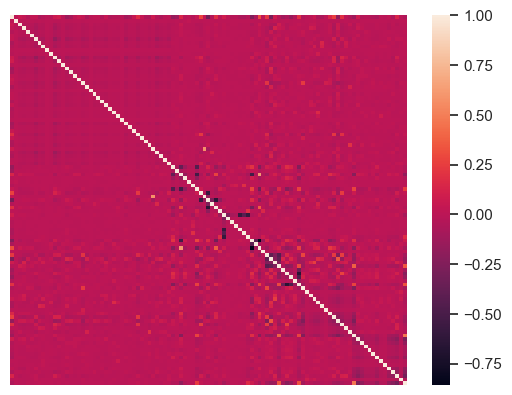

In [115]:
# Draw each cell as a scatter point with varying size and color
g = sns.heatmap(data=corr_mat, xticklabels=False, yticklabels=False)



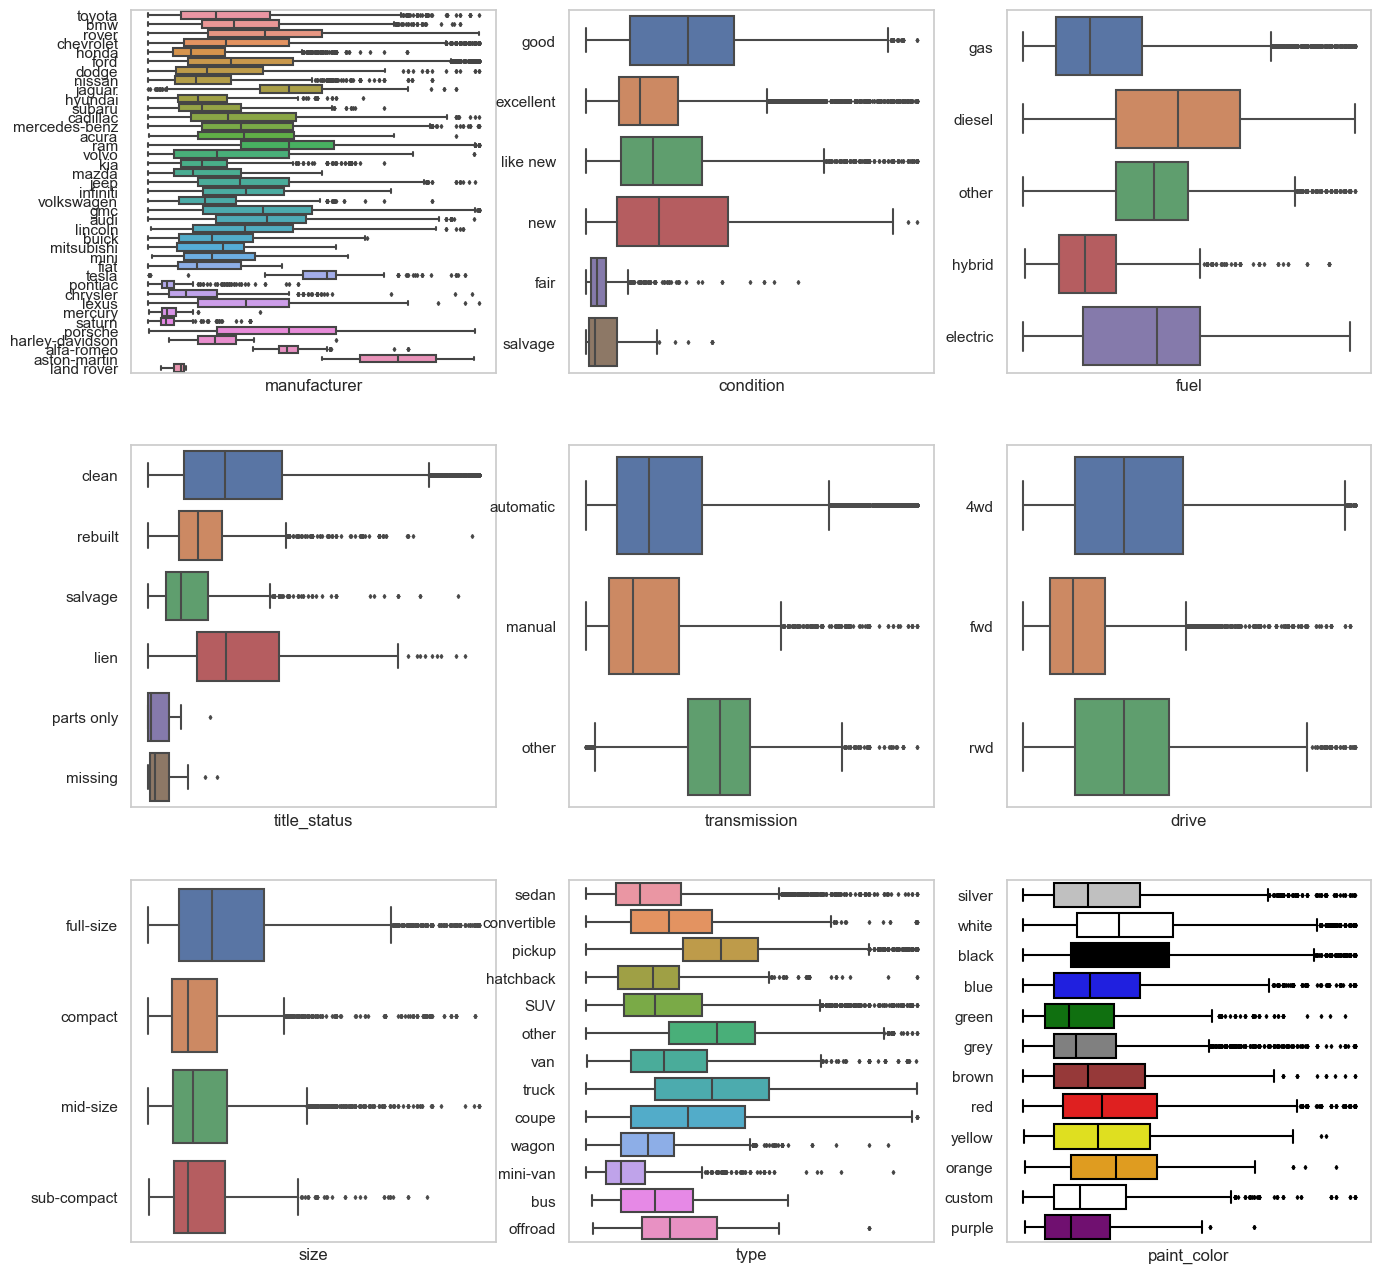

In [116]:
paint_color_dict = {cars_data_cat['paint_color'].value_counts().index[i]: cars_data_cat['paint_color'].value_counts().index[i] for i in range(len(cars_data_cat['paint_color'].value_counts().index))}
paint_color_dict['custom'] = 'white'

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (16, 16))
for ax1 in range(3):
    for ax2 in range(3):
        axplot = sns.boxplot(cars_data_cat.iloc[np.random.choice(range(cars_data_cat.shape[0]), 100000)], 
                             y = categorical_columns_categorical[ax1*3 + ax2], x= 'price', 
                             ax= axs[ax1][ax2], fliersize= 2, width= 0.8, whis = 1.5,
                            palette= paint_color_dict if (ax1*3 + ax2 == 8) else None)
        axplot.set(ylabel = '')
        axplot.set(xlabel= categorical_columns_categorical[ax1*3 + ax2])
        axplot.set_xticks(ticks = [])
        # axplot.set_yticks(ticks = [])


In [117]:
categorical_columns_categorical[0]

'manufacturer'

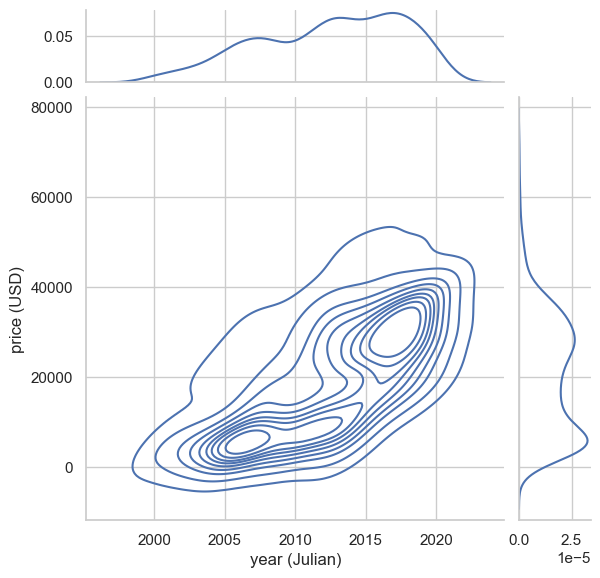

In [106]:
ax = sns.jointplot(data = cars_data_cat.iloc[:1000], y = 'price', x = 'year', kind = 'hex', marginal_ticks=True)
ax.ax_joint.set(ylabel= 'price (USD)', xlabel = 'year (Julian)')
ax.ax_joint.set_xticks(ticks = range(2000, 2021, 5), labels=range(2000, 2021, 5), minor=False)

[-100000.       0.  100000.  200000.  300000.  400000.]


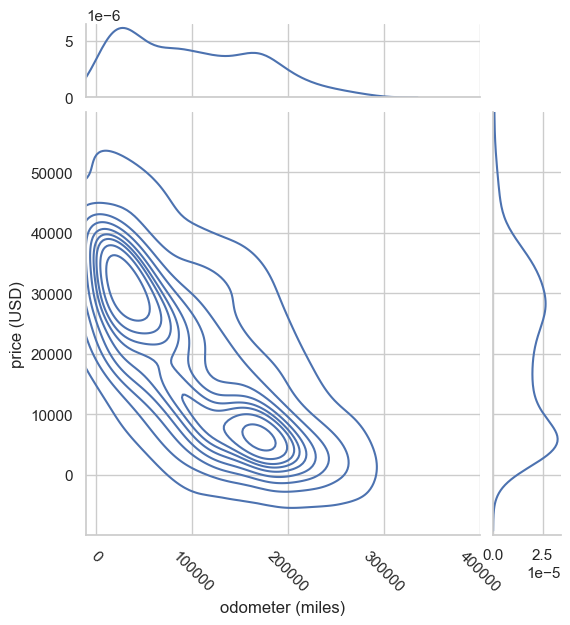

In [107]:
ax = sns.jointplot(data = cars_data_cat.iloc[:1000], y = 'price', x = 'odometer', kind = 'kde', marginal_ticks=True, 
                   xlim = (-10000, 400000), ylim=(-10000, 60000))
ax.ax_joint.set(xlabel = 'odometer (miles)', ylabel='price (USD)')
import matplotlib
print(ax.ax_joint.get_xticks())

ax.ax_joint.set_yticks(ticks = ax.ax_joint.get_yticks()[1:-1], labels=list(map(int, ax.ax_joint.get_yticks()[1:-1])))
ax.ax_joint.set_xticks(ticks = ax.ax_joint.get_xticks()[1:], labels=list(map(int, ax.ax_joint.get_xticks()[1:])), rotation = -45)

[-50000.      0.  50000. 100000. 150000. 200000. 250000. 300000. 350000.
 400000.]
[]


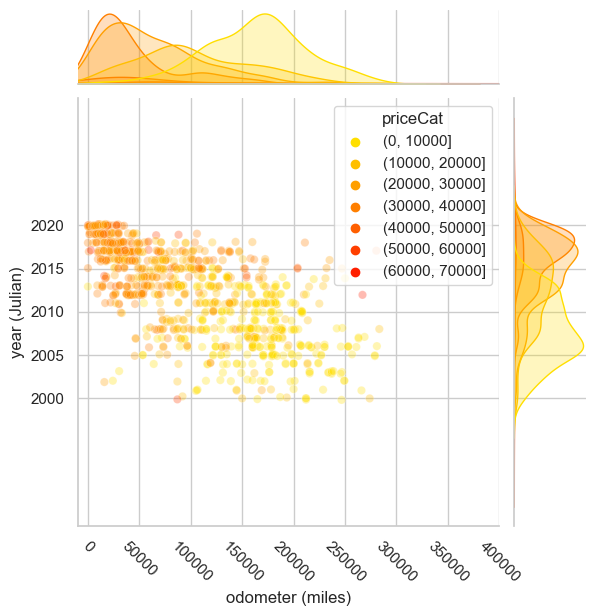

In [108]:
cars_data_cat['priceCat'] = pd.cut(cars_data_cat['price'], bins = range(0, max(cars_data_cat['price'])+1, 10000))
cars_data_cat['yearNoise'] = cars_data_cat['year'] + np.random.randn(len(cars_data_cat['year']))/10

ax = sns.jointplot(data = cars_data_cat.iloc[:1000], y = 'yearNoise', x = 'odometer', hue='priceCat', kind = 'scatter', marginal_ticks=False, 
                   xlim = (-10000, 400000), hue_order=np.unique(cars_data_cat['priceCat'].values), 
                   palette=sns.color_palette('autumn_r', n_colors=len(np.unique(cars_data_cat['priceCat'].values))), alpha = 0.3)
ax.ax_joint.set(xlabel = 'odometer (miles)', ylabel= 'year (Julian)')
import matplotlib
print(ax.ax_joint.get_xticks())
ax.ax_joint.set_yticks(ticks = range(2000, 2021, 5), labels=range(2000, 2021, 5), minor=False)
ax.ax_joint.set_xticks(ticks = ax.ax_joint.get_xticks()[1:], labels=list(map(int, ax.ax_joint.get_xticks()[1:])), rotation = -45)
print(ax.ax_marg_x.set_yticks(ticks = []))


70000

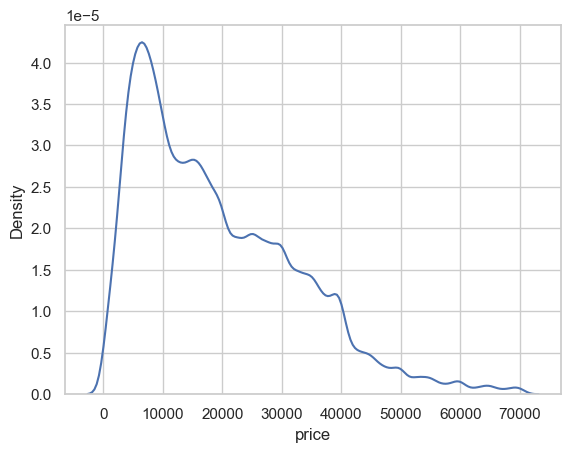

In [109]:
sns.kdeplot(cars_data_cat, x = 'price')
max(cars_data_cat['price'])